<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

In [ ]:
!pip install category_encoders 

In [ ]:
!pip install eli5 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance

## **Part 1. 데이터 준비**

- 데이터셋을 불러오세요.
  - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [ ]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# target, features 지정 
y = df['Attrition']
X = df.drop('Attrition', axis=1)

In [ ]:
# train/test dataset 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

##### **Q1. 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


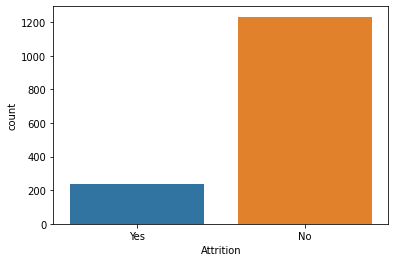

In [ ]:
# 타겟 데이터 범주 비율 확인
print(y.value_counts(normalize=True))
sns.countplot(x=y);

In [ ]:
# 타겟 라벨 인코딩 
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# 기준모델 AUC score
base_major = pd.Series(y_train).mode()
y_pred_base = [base_major] * len(y_train)
print('Baseline score :', round(roc_auc_score(y_train, y_pred_base),2))

Baseline score : 0.5


In [ ]:
# RandomForest 학습 
rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=3))

rf.fit(X_train, y_train)

# 데이터셋이 작아서 cross_val_score로 검증 점수 확인 
rf_cv = cross_val_score(rf,
                     X_train,
                     y_train,
                     cv = 10,
                     scoring='roc_auc',
                     n_jobs=-1
)

# AUC score 확인 
y_pred_proba_train = rf.predict_proba(X_train)[:, 1]
print("train score : ", roc_auc_score(y_train, y_pred_proba_train))
print('cv score : ', rf_cv.mean())

train score :  0.8660789903121192
cv score :  0.8021099139601582


## **Part 3. 순열중요도**

- **3-1.** `PermutationImportance()`를 사용해 `permuter`를 정의하고 평가 데이터셋에 적용하세요.
  - 모델은 RandomForest, 평가지표는 AUC, `n_iter = 5`, `random_state = 42` 로 설정하세요.
  - 평가 데이터셋에 대하여 특성에 Ordinal Encoding을 적용하고, `permuter`로 score를 다시 계산하세요. 
  - eli5 라이브러리의 `.show_weights`를 사용해 특성별 score를 확인하세요. (`top=None`) 

- **3-2.** score가 평균보다 큰 특성들만 추출하여 랜덤포레스트 모델을 학습하세요.
  - 타겟과 특성(score가 평균보다 큰)을 지정합니다.
  - 훈련/평가 데이터셋을 분리합니다. (8:2의 비율로 분리, `random_state=42`)
  - 특성은 Ordinal Encoding을 적용합니다. 
  - `RandomForestClassifier`(`random_state=42`, `n_jobs=-1`, `max_depth=3`)를 사용하여 모델을 학습합니다.

- **3-3.** `cross_val_score`(`cv=10`,`n_jobs=-1`,`scoring = roc_auc`)를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - 검증 score는 평균값으로 구할 수 있습니다.
  - 평가 데이터셋에 대하여도 모델의 AUC score를 구하세요.

##### **Q2. 순열중요도 계산 결과 score가 가장 높은 특성의 이름을 제출해 주세요.**

##### **Q3. 상위 특성으로 학습한 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

##### **Q4. 평가 데이터셋에 대하여 모델의 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [ ]:
# permuter 정의 
permuter = PermutationImportance(
    rf.named_steps['randomforestclassifier'],
    scoring='roc_auc',
    n_iter=5, 
    random_state=42
)

In [ ]:
# test dataset 특성 Ordinal Encoding  
X_test_preprocessed = rf[0].transform(X_test)

# score 다시 계산
permuter.fit(X_test_preprocessed, y_test)

PermutationImportance(estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='roc_auc')

In [ ]:
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names 
)

Weight,Feature
0.0382 ± 0.0328,OverTime
0.0171 ± 0.0181,Age
0.0123 ± 0.0231,StockOptionLevel
0.0087 ± 0.0048,EnvironmentSatisfaction
0.0086 ± 0.0044,DistanceFromHome
0.0082 ± 0.0055,JobInvolvement
0.0077 ± 0.0077,TotalWorkingYears
0.0077 ± 0.0067,JobSatisfaction
0.0067 ± 0.0038,BusinessTravel
0.0057 ± 0.0027,JobRole


In [ ]:
# 순열중요도 상위 특성 추출 
permutation = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)
features = permutation[(permutation.values > np.mean(permutation.values))].index
features

Index(['OverTime', 'Age', 'StockOptionLevel', 'EnvironmentSatisfaction',
       'DistanceFromHome', 'JobInvolvement', 'TotalWorkingYears',
       'JobSatisfaction', 'BusinessTravel', 'JobRole'],
      dtype='object')

In [ ]:
# target/features 지정
y = df['Attrition']
X = df[features]

# train/test dataset 분리
X_train_pi, X_test_pi, y_train_pi, y_test_pi = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X_train_pi.shape, X_test_pi.shape, y_train_pi.shape, y_test_pi.shape

((1176, 10), (294, 10), (1176,), (294,))

In [ ]:
# 모델 학습 
pi_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=3))

pi_rf.fit(X_train_pi, y_train_pi)

# 데이터셋이 작아서 cross_val_score로 검증 점수 확인
rf_cv_pi = cross_val_score(pi_rf,
                     X_train_pi,
                     y_train_pi,
                     cv = 10,
                     scoring='roc_auc',
                     n_jobs=-1
)

# AUC score 확인 
y_pred_pi = pi_rf.predict_proba(X_train_pi)[:, 1]
print("train score : ", roc_auc_score(y_train_pi, y_pred_pi))
print('cv score : ', rf_cv_pi.mean()) # AUC score에 큰 차이가 없으므로 일부 특성만 사용하여 학습할 수 있다. 

train score :  0.844232199293549
cv score :  0.7958899919164627


In [ ]:
y_pred_proba_pi = pi_rf.predict_proba(X_test_pi)[:, 1]
print("AUC:", roc_auc_score(y_test_pi, y_pred_proba_pi))

AUC: 0.7188536953242836


# 🥇 **도전 과제**

## **Part 4. 프로젝트 준비**

> 다음주부터 프로젝트가 진행됩니다. <br>
> 관심있는 프로젝트 주제와 데이터를 살펴보시고, 데이터가 정해졌다면 해당 데이터로 도전과제를 진행해보세요.

- 프로젝트에 사용할 데이터셋을 불러오세요.
- 모든 특성에 대하여 모델을 학습하고, 평가지표를 구하세요. 
  - 타겟과 문제에 적합한 모델을 사용합니다. 
- 순열중요도를 계산하세요.
- 순열중요도의 상위 특성만 사용하여 모델을 학습하고, 평가지표를 구하세요. 
- 모든 특성에 대하여 모델을 학습했을 때와 상위 특성만 사용하여 모델을 학습했을 때의 평가지표를 비교해 보세요. 